In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score, f1_score

In [87]:
url = "https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/master/Bases%20de%20dados/dados_produtos.csv"
df = pd.read_csv(url)
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


Produtos disponíveis: ['Televisão' 'Celular' 'Cafeteira' 'Videogame' 'iPod' 'Notebook']

=== Televisão ===
Precisão: 0.67
Recall: 0.50
F1-Score: 0.57


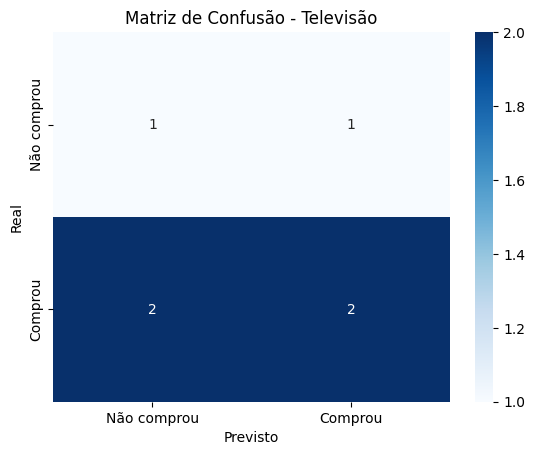


=== Celular ===
Precisão: 0.40
Recall: 0.50
F1-Score: 0.44


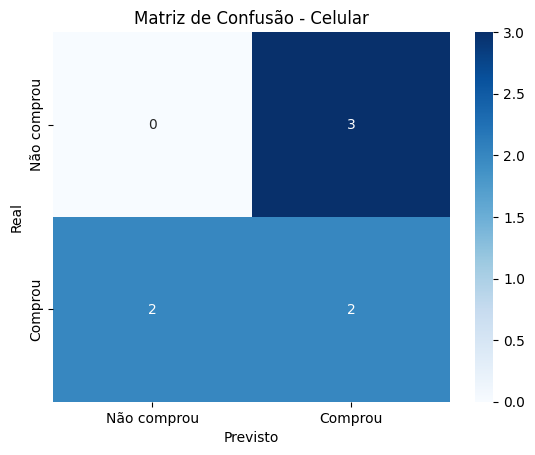


=== Cafeteira ===
Precisão: 1.00
Recall: 0.50
F1-Score: 0.67


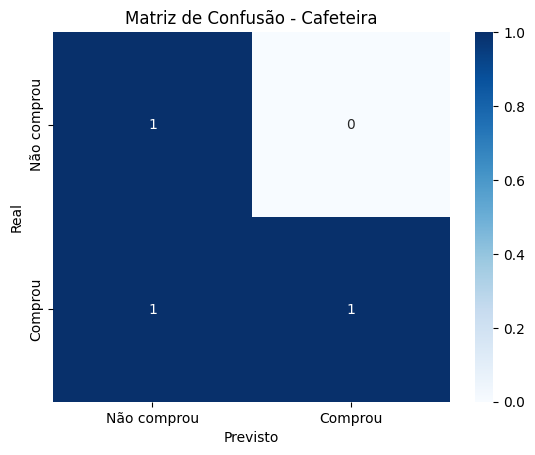


=== Videogame ===
Precisão: 0.67
Recall: 1.00
F1-Score: 0.80


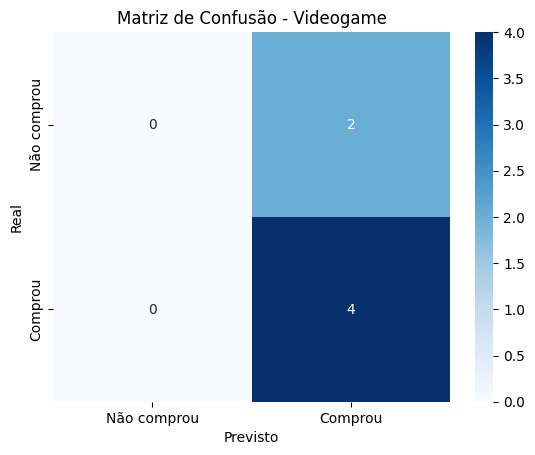


=== iPod ===
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00


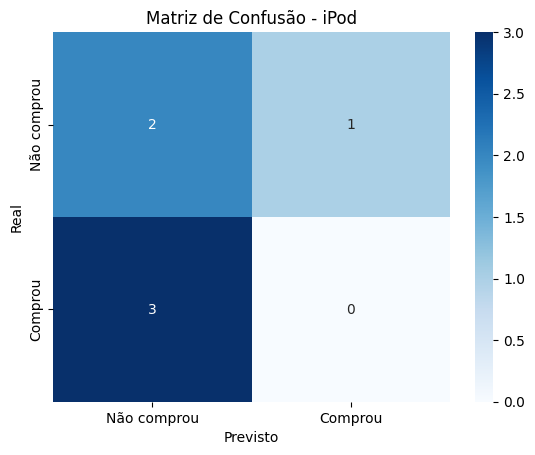


=== Notebook ===
Precisão: 0.33
Recall: 0.50
F1-Score: 0.40


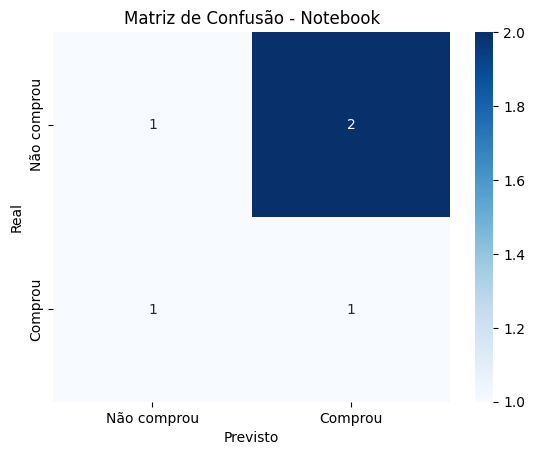

In [88]:
print("Produtos disponíveis:", df['product_name'].unique())

# Loop para avaliar cada produto
for produto in df['product_name'].unique():
    print(f"\n=== {produto} ===")
    
    dados = df[df['product_name'] == produto]
    X = dados[['rating', 'rating_count']]
    y = dados['purchased']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    modelo = DecisionTreeClassifier(random_state=0)
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    
    precisao = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Precisão: {precisao:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Não comprou', 'Comprou'],
                yticklabels=['Não comprou', 'Comprou'])
    plt.title(f"Matriz de Confusão - {produto}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


In [89]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

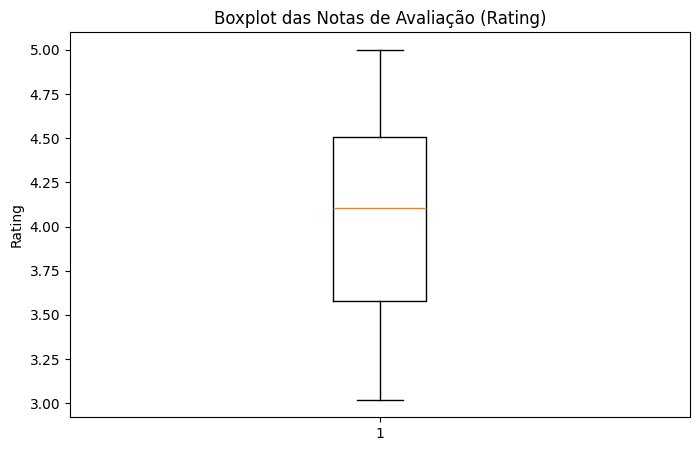

In [90]:
plt.figure(figsize=(8,5))
plt.boxplot(df['rating'])
plt.title('Boxplot das Notas de Avaliação (Rating)')
plt.ylabel('Rating')
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_24428\822352600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='rating', data=df ,palette=['green','orange','red','blue','yellow','pink'])


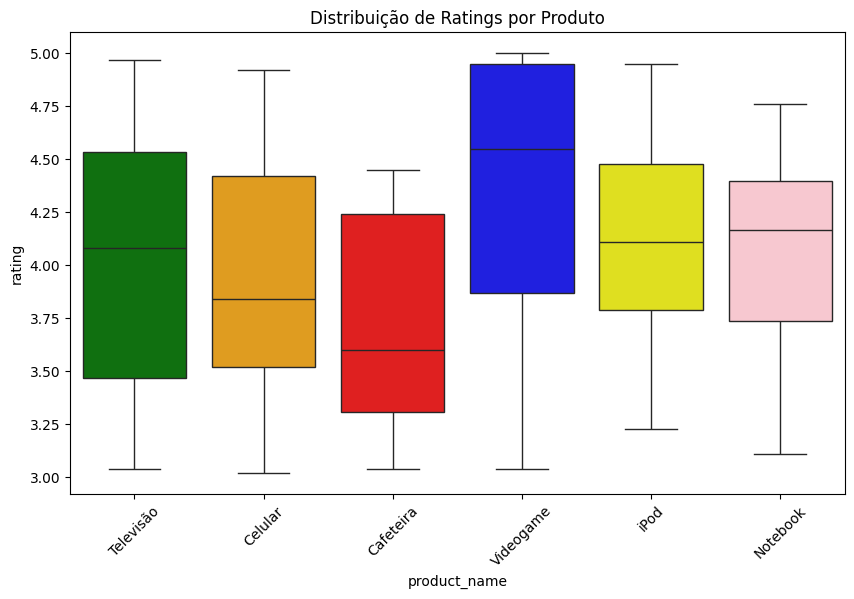

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x='product_name', y='rating', data=df ,palette=['green','orange','red','blue','yellow','pink'])
plt.title('Distribuição de Ratings por Produto')
plt.xticks(rotation=45)
plt.show()

In [92]:
df.isnull().sum()
df = df.dropna()
df = pd.get_dummies(df, columns=['product_name'], drop_first=True)
df.head()

,rating,rating_count,purchased,product_name_Celular,product_name_Notebook,product_name_Televisão,product_name_Videogame,product_name_iPod
0,3.04,29,1,False,False,True,False,False
1,3.46,3872,0,True,False,False,False,False
2,3.25,1187,0,False,False,False,False,False
3,3.77,4097,1,False,False,True,False,False
4,5.00,4738,1,False,False,False,True,False


In [93]:
X = df.drop('purchased', axis=1)
y = df['purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (70, 7)
Tamanho teste: (30, 7)


In [94]:
modelo = SVC(kernel='linear')
modelo.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [95]:
yprev = modelo.predict(X_test)

In [96]:
yprev

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0])

In [97]:
X_test

,rating,rating_count,product_name_Celular,product_name_Notebook,product_name_Televisão,product_name_Videogame,product_name_iPod
83,4.36,798,True,False,False,False,False
53,4.24,3065,False,False,False,False,False
70,4.01,3651,False,False,True,False,False
45,4.98,4566,False,False,False,True,False
44,3.45,2895,False,False,True,False,False
39,4.31,1786,True,False,False,False,False
22,4.49,230,False,False,False,False,True
80,3.38,583,True,False,False,False,False
10,4.43,2748,True,False,False,False,False
0,3.04,29,False,False,True,False,False


In [98]:
acc =accuracy_score(yprev,y_test)
print(f'Acurácia: {acc}')

Acurácia: 0.36666666666666664


In [99]:
cr = classification_report(yprev,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.11      0.08      0.10        12
           1       0.48      0.56      0.51        18

    accuracy                           0.37        30
   macro avg       0.29      0.32      0.30        30
weighted avg       0.33      0.37      0.35        30



In [100]:
cm = confusion_matrix(yprev,y_test)
print(cm)

[[ 1 11]
 [ 8 10]]


Text(50.72222222222221, 0.5, 'Previsão')

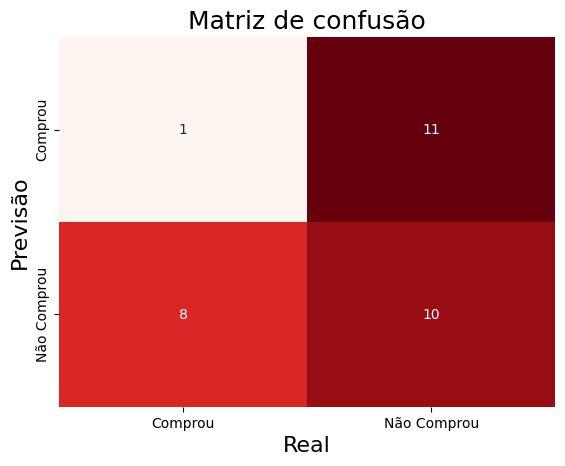

In [101]:
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,xticklabels=['Comprou','Não Comprou'],
            yticklabels=['Comprou','Não Comprou'])
plt.title('Matriz de confusão',fontsize=18)
plt.xlabel('Real',fontsize=16)
plt.ylabel('Previsão',fontsize=16)

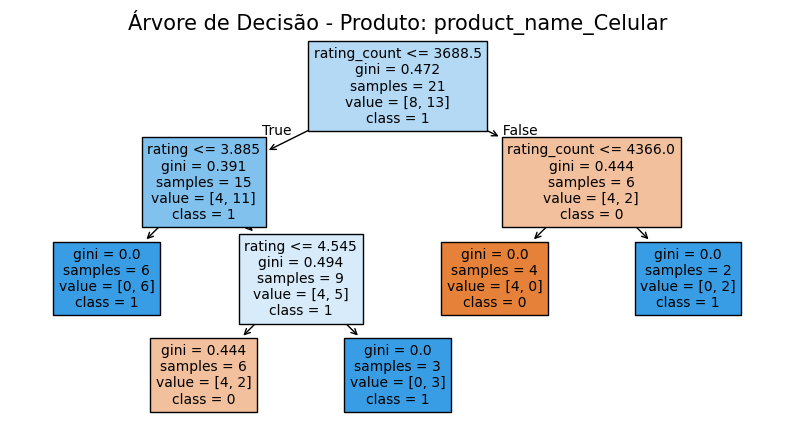

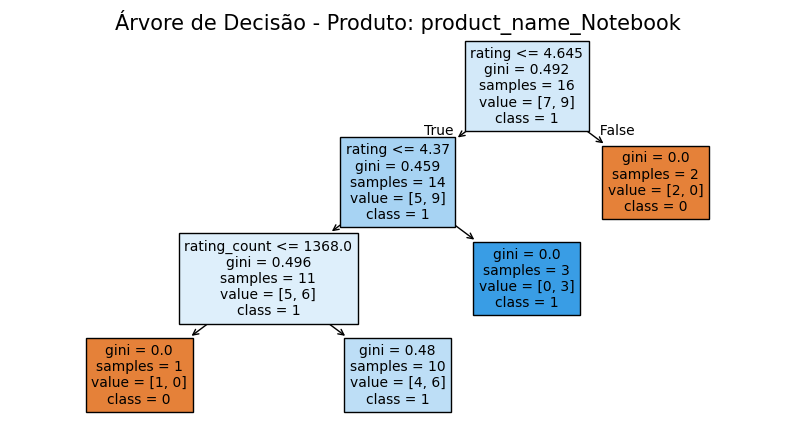

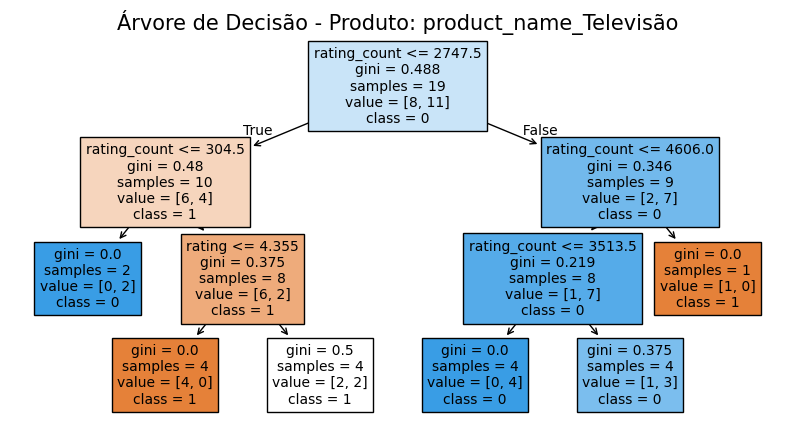

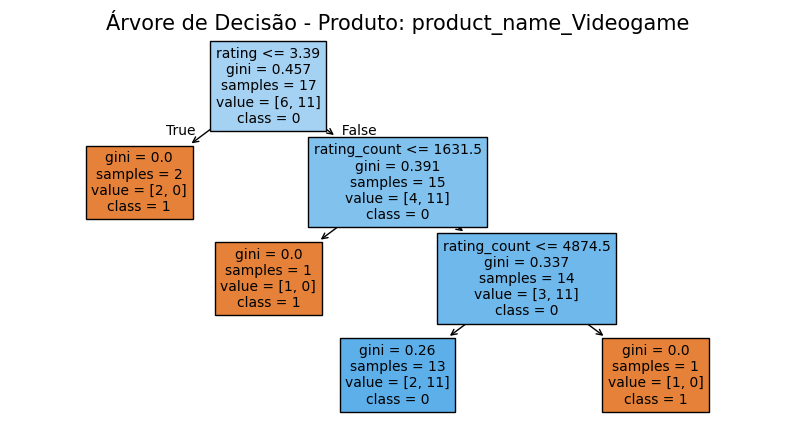

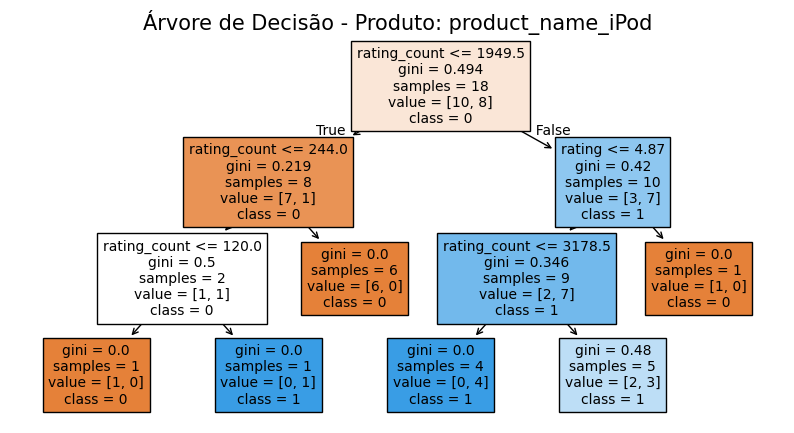

In [ ]:
# Lista das colunas de produto
produtos = ['product_name_Celular', 'product_name_Notebook', 
            'product_name_Televisão', 'product_name_Videogame', 'product_name_iPod']

# Alvo
col_alvo = 'purchased'

for produto in produtos:
    # Filtra apenas as linhas onde o produto está presente (1)
    dados_produto = df[df[produto] == 1]
    
    if dados_produto.empty:
        continue  # pula se não houver dados
    
    # Features: todas menos as colunas de produtos e o alvo
    X = dados_produto.drop(produtos + [col_alvo], axis=1)
    y = dados_produto[col_alvo]
    
    # Treina o modelo
    modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
    modelo.fit(X, y)
    
    # Plota a árvore
    plt.figure(figsize=(10, 5))
    plot_tree(modelo,
              feature_names=X.columns,
              class_names=[str(c) for c in y.unique()],
              filled=True,
              fontsize=10)
    plt.title(f"Árvore de Decisão - Produto: {produto}", fontsize=15)
    plt.show()

In [103]:
print("""
CONCLUSÃO

O modelo de Árvore de Decisão conseguiu prever, em boa parte dos casos, 
quais clientes comprariam os produtos com base nas notas e na quantidade de avaliações.

Alguns produtos tiveram resultados melhores que outros, o que mostra que o modelo 
funciona bem, mas ainda pode ser melhorado com mais dados e informações.

De forma geral, o modelo foi eficiente para entender o comportamento dos clientes 
e pode ajudar a empresa a tomar decisões mais inteligentes.
""")


CONCLUSÃO

O modelo de Árvore de Decisão conseguiu prever, em boa parte dos casos, 
quais clientes comprariam os produtos com base nas notas e na quantidade de avaliações.

Alguns produtos tiveram resultados melhores que outros, o que mostra que o modelo 
funciona bem, mas ainda pode ser melhorado com mais dados e informações.

De forma geral, o modelo foi eficiente para entender o comportamento dos clientes 
e pode ajudar a empresa a tomar decisões mais inteligentes.

